# Introduction to Problem

The dataset for the problem comprises records of commuter journeys. The Python codes are to be expressed to analyse the commuters journeys. We have to perform different data preperation tasks and then we would get different insights from the data. 


## Dealing with Project Objectives

(a) In the dataset, ‘-’, ‘--’, and ‘?’ are considered as missing values, and the variable columns of the dataset are noted as in the data dictionary in order. As part of data preparation, read the dataset in as a Pandas dataframe, with the above considerations.

In [57]:
# Importing the necessory library
import pandas as pd

In [58]:
# Reading the dataset as Pandas dataframe
commuters = pd.read_csv('../Data/commuters.csv')
commuters.head()

C:\Users\Muhammad Hassan\AppData\Local\Temp\ipykernel_3300\3731410379.py:2: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  commuters = pd.read_csv('../Data/commuters.csv')


,origin,destination,start,end,id,type,subscriber,yob,age,gender
0,316.0,311.0,2022-01-01 00:07:41.040,2022-01-01 00:10:06.241,2473,Concession,No,1957,63,Male
1,74.0,70.0,2022-01-01 00:07:52.943,2022-01-01 00:19:47.075,2423,Regular,No,1986,34,Male
2,97.0,125.0,2022-01-01 00:09:31.745,2022-01-01 00:28:43.159,3455,Regular,No,1992,28,Male
3,11.0,323.0,2022-01-01 00:14:37.187,2022-01-01 00:37:16.445,2173,Ad-Hoc,No,1995,25,Male
4,17.0,8.0,2022-01-01 00:15:33.369,2022-01-01 00:58:56.522,1788,Regular,Yes,1994,26,Male


In [59]:
# Checking the basic information about the data
commuters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 670009 entries, 0 to 670008
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   origin       669505 non-null  float64
 1   destination  669505 non-null  float64
 2   start        670009 non-null  object 
 3   end          670009 non-null  object 
 4   id           670009 non-null  int64  
 5   type         670009 non-null  object 
 6   subscriber   670009 non-null  object 
 7   yob          670009 non-null  object 
 8   age          670009 non-null  object 
 9   gender       670009 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 51.1+ MB


In [60]:
# Using describe() to get some more information about the features
commuters.describe()

,origin,destination,id
count,669505.000000,669505.000000,670009.000000
mean,113.350947,111.389453,2174.952754
std,94.125066,93.750900,1183.285391
min,3.000000,3.000000,11.000000
25%,31.000000,30.000000,1177.000000
50%,84.000000,81.000000,2265.000000
75%,178.000000,178.000000,3188.000000
max,356.000000,356.000000,4307.000000


(b) Identify the variable columns which have missing values. As part of data preparation, implement ways to treat them, and explain your rationale. State any interesting observation(s).

In [61]:
# Checking the null values in the dataset.
commuters.isna().sum()

origin         504
destination    504
start            0
end              0
id               0
type             0
subscriber       0
yob              0
age              0
gender           0
dtype: int64

**Observation**

There are two columns in the dataset which have blank values in the samples. Both columns are of float datatype.

In [62]:
# Making a userdefined function to check which feature columns have any of the missing values.

def has_missing_values(variable_column):
    '''
    Check any of the missing value in the variable column.
    '''

    missing_value_1 = "-" in variable_column
    missing_value_2 = "--" in variable_column
    missing_value_3 = "?" in variable_column
    
    to_return = [True]
    if missing_value_1:
        to_return.append("-")
    if missing_value_2:
        to_return.append("--")
    if missing_value_3:
        to_return.append("?")

    if missing_value_1 or missing_value_2 or missing_value_3:
        return to_return
    else:
        return False

In [63]:
def display_variables_missing_values(df):

    # Storing the results in a dictionary by calling a function on all columns
    result = {}
    for column in df.columns:
        result[column] = has_missing_values(list(df[column].unique()))

    for variable, values in result.items():
        print(f"{variable}: {values}")

In [64]:
display_variables_missing_values(commuters)

origin: False
destination: False
start: False
end: False
id: False
type: [True, '?']
subscriber: False
yob: [True, '--']
age: [True, '--']
gender: [True, '-']


**Observation**

We have **identified** that the feature columns `origin` and `destination` have the blank values in them by using `isna()`. Also, there are the columns `type`, `yob`, `age`, and `gender` which have the missing values. The function is returing the columns which have missing values along with the missing values which are present in those columns.

### Treating the missing values

When we are dealing with the missing values in a dataset, we can perform different operations on them. They could be:

1. Fill the missing values with some appropriate value (Also known as Imputation)
2. Remove the samples with the missing values altogether

In the case of excessively large number of samples present, we can skip the samples with the missing values. Otherwise we prefer to fill them with some appropriate values.

The missing values can be filled with the maximum number of values that are present in the column. They can also be filled with the average of all the available values in the case of numeric column. In some cases, we can fill the missing values with the label "missing" to identify that these were the cells which are filled during Imputation.

## Implementing the ways to treat missing values

In [65]:
# Removing the samples with missing values in the dataset
commuters.dropna(subset=['origin'], inplace=True)
commuters.isna().sum()

origin         0
destination    0
start          0
end            0
id             0
type           0
subscriber     0
yob            0
age            0
gender         0
dtype: int64

In [66]:
commuters.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 669505 entries, 0 to 670007
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   origin       669505 non-null  float64
 1   destination  669505 non-null  float64
 2   start        669505 non-null  object 
 3   end          669505 non-null  object 
 4   id           669505 non-null  int64  
 5   type         669505 non-null  object 
 6   subscriber   669505 non-null  object 
 7   yob          669505 non-null  object 
 8   age          669505 non-null  object 
 9   gender       669505 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 56.2+ MB


We can see that the `type` column has `?` missing value. As the `type` is of `object` datatype, we will be filling it with the maximum value that appears in the `type` column.

In [67]:
commuters['type'].value_counts()

Regular       554893
Ad-Hoc         68030
Concession     46572
?                 10
Name: type, dtype: int64

**Observation**

`type` column has a value: `Regular` which appeared most of the times. So, we are filling the missing value with `Regular`.

In [68]:
commuters['type'] = commuters['type'].replace({"?": "Regular"})

In [69]:
# Checking the "type" column for missing values
commuters['type'].value_counts()

Regular       554903
Ad-Hoc         68030
Concession     46572
Name: type, dtype: int64

**Observation**

Now we see that, the missing value does not exist anymore. Similar procedure will be applied for other columns with missing values

#### `yob` column

In [70]:
commuters['yob'].value_counts()

1988    35043
1987    30583
1989    29992
1985    29113
1984    27857
        ...  
1951      119
1955      116
1949      102
1953       79
--         10
Name: yob, Length: 104, dtype: int64

In [71]:
commuters['yob'] = commuters['yob'].replace({"--": 1988})

In [72]:
commuters['yob'].value_counts()     

1988    35053
1987    30583
1989    29992
1985    29113
1984    27857
        ...  
1999      124
1951      119
1955      116
1949      102
1953       79
Name: yob, Length: 103, dtype: int64

### `age` column

In [73]:
commuters['age'].value_counts()

32    35043
33    30583
31    29992
35    29113
36    27857
      ...  
69      119
65      116
71      102
67       79
--       10
Name: age, Length: 104, dtype: int64

In [74]:
commuters['age'] = commuters['age'].replace({"--": 32})

In [75]:
commuters['age'].value_counts()

32    35053
33    30583
31    29992
35    29113
36    27857
      ...  
21      124
69      119
65      116
71      102
67       79
Name: age, Length: 103, dtype: int64

### `gender` column

In [76]:
commuters['gender'].value_counts()

Male      493844
Female    165749
Other       9909
-              3
Name: gender, dtype: int64

In [77]:
commuters['gender'] = commuters['gender'].replace({"-": "Male"})

In [78]:
commuters['gender'].value_counts()

Male      493847
Female    165749
Other       9909
Name: gender, dtype: int64

In [79]:
# Checking whether any of the column still contains some missing values or not
display_variables_missing_values(commuters)

origin: False
destination: False
start: False
end: False
id: False
type: False
subscriber: False
yob: False
age: False
gender: False


**Observation**

All the missing values are now gone and the dataset is now filled.

### Interesting Observations

1. When performing the replacement in the data, we encountered the issue of `chained indexing`. While the process of chain indexing, we got `SettingWithCopy` warning. This occured because in this case, it's hard to predict whether it will return a view or a copy. That's why we changed this method with the replacing method.
2. While finding the missing values, the blank values were not being compared as they had not any specific datatype. So, for getting rid of those missing data, we removed the samples with the missing values. 
3. After handling with the missing values, our dataset is now filled and does not contain any missing values. 

(c) As part of data preparation, identify three (3) other data quality issues in the data. Similarly, suggest and implement ways to treat them, and explain your rationale.

## Other data qauality issues

1. **Mixed Datatypes**: There is `type mismatch` in `age` and `yob` columns. Some of the values are in string format and some are in the numeric format. This cause the problem in dealing with the same kind of data. For example if we want to sort the list, it would not possible because of the data type mixing.
2. **Create Dummy Variables**: There are some categorical variable columns which need to be reduced during data preperation. Keeping all our data in numeric format is one of the quality assurance about the data.
3. **Too much Data**: I think that there is too much data in the dataset which is causing some difficulty in getting information from some attributes of data. Due to the massive amount of data, some other data quality issues are becoming more severe. It sometimes become difficult to extract information of such type of columns which have too much unique values as we cannot compare them with some other independent variable columns. Sometimes these kind of features need transformation to be properly scaled.

### Treating issue 1

In [80]:
commuters['age'].unique()

array(['63', '34', '28', '25', '26', '27', '36', '40', '35', '39', '29',
       '30', '45', '31', '32', '37', '41', '33', '38', '42', '49', '47',
       '57', '44', '55', '51', '24', '23', '22', '52', '60', '70', '59',
       '46', '68', '62', '64', '58', '43', '54', '56', '66', '61', '67',
       '65', '50', '48', '21', '69', '53', '71', 32, 55, 33, 53, 35, 38,
       58, 27, 26, 31, 30, 28, 29, 42, 36, 37, 34, 48, 25, 43, 49, 64, 40,
       41, 24, 44, 22, 50, 60, 39, 63, 65, 57, 61, 45, 56, 47, 52, 46, 21,
       59, 23, 62, 51, 70, 68, 66, 54, 67, 69, 71, 20], dtype=object)

In [81]:
commuters['age'] = commuters['age'].astype('int64')
commuters['age'].unique()

array([63, 34, 28, 25, 26, 27, 36, 40, 35, 39, 29, 30, 45, 31, 32, 37, 41,
       33, 38, 42, 49, 47, 57, 44, 55, 51, 24, 23, 22, 52, 60, 70, 59, 46,
       68, 62, 64, 58, 43, 54, 56, 66, 61, 67, 65, 50, 48, 21, 69, 53, 71,
       20], dtype=int64)

In [82]:
commuters['yob'].unique()

array(['1957', '1986', '1992', '1995', '1994', '1993', '1984', '1980',
       '1985', '1981', '1991', '1990', '1975', '1989', '1988', '1983',
       '1979', '1987', '1982', '1978', '1971', '1973', '1963', '1976',
       '1965', '1969', '1996', '1997', '1998', '1968', '1960', '1950',
       '1961', '1974', '1952', '1958', '1956', '1962', '1977', '1966',
       '1964', '1954', '1959', '1953', '1955', '1970', '1972', '1999',
       '1951', '1967', '1949', 1988, 1965, 1987, 1967, 1985, 1982, 1962,
       1993, 1994, 1989, 1990, 1992, 1991, 1978, 1984, 1983, 1986, 1972,
       1995, 1977, 1971, 1956, 1980, 1979, 1996, 1976, 1998, 1970, 1960,
       1981, 1957, 1955, 1963, 1959, 1975, 1964, 1973, 1968, 1974, 1999,
       1961, 1997, 1958, 1969, 1950, 1952, 1954, 1966, 1953, 1951, 1949,
       2000], dtype=object)

In [83]:
commuters['yob'] = commuters['yob'].astype('int64')
commuters['yob'].unique()

array([1957, 1986, 1992, 1995, 1994, 1993, 1984, 1980, 1985, 1981, 1991,
       1990, 1975, 1989, 1988, 1983, 1979, 1987, 1982, 1978, 1971, 1973,
       1963, 1976, 1965, 1969, 1996, 1997, 1998, 1968, 1960, 1950, 1961,
       1974, 1952, 1958, 1956, 1962, 1977, 1966, 1964, 1954, 1959, 1953,
       1955, 1970, 1972, 1999, 1951, 1967, 1949, 2000], dtype=int64)

In [84]:
commuters.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 669505 entries, 0 to 670007
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   origin       669505 non-null  float64
 1   destination  669505 non-null  float64
 2   start        669505 non-null  object 
 3   end          669505 non-null  object 
 4   id           669505 non-null  int64  
 5   type         669505 non-null  object 
 6   subscriber   669505 non-null  object 
 7   yob          669505 non-null  int64  
 8   age          669505 non-null  int64  
 9   gender       669505 non-null  object 
dtypes: float64(2), int64(3), object(5)
memory usage: 56.2+ MB


### Treating Issue 2

In [85]:
commuters.head()

,origin,destination,start,end,id,type,subscriber,yob,age,gender
0,316.0,311.0,2022-01-01 00:07:41.040,2022-01-01 00:10:06.241,2473,Concession,No,1957,63,Male
1,74.0,70.0,2022-01-01 00:07:52.943,2022-01-01 00:19:47.075,2423,Regular,No,1986,34,Male
2,97.0,125.0,2022-01-01 00:09:31.745,2022-01-01 00:28:43.159,3455,Regular,No,1992,28,Male
3,11.0,323.0,2022-01-01 00:14:37.187,2022-01-01 00:37:16.445,2173,Ad-Hoc,No,1995,25,Male
4,17.0,8.0,2022-01-01 00:15:33.369,2022-01-01 00:58:56.522,1788,Regular,Yes,1994,26,Male


In [86]:
dummies = pd.get_dummies(commuters[["type", "gender"]])
dummies.head()

,type_Ad-Hoc,type_Concession,type_Regular,gender_Female,gender_Male,gender_Other
0,0,1,0,0,1,0
1,0,0,1,0,1,0
2,0,0,1,0,1,0
3,1,0,0,0,1,0
4,0,0,1,0,1,0


In [87]:
dummy_dataframe = commuters.drop(["type", "gender"], axis=1)
pd.concat([dummy_dataframe, dummies], axis=1).head()

,origin,destination,start,end,id,subscriber,yob,age,type_Ad-Hoc,type_Concession,type_Regular,gender_Female,gender_Male,gender_Other
0,316.0,311.0,2022-01-01 00:07:41.040,2022-01-01 00:10:06.241,2473,No,1957,63,0,1,0,0,1,0
1,74.0,70.0,2022-01-01 00:07:52.943,2022-01-01 00:19:47.075,2423,No,1986,34,0,0,1,0,1,0
2,97.0,125.0,2022-01-01 00:09:31.745,2022-01-01 00:28:43.159,3455,No,1992,28,0,0,1,0,1,0
3,11.0,323.0,2022-01-01 00:14:37.187,2022-01-01 00:37:16.445,2173,No,1995,25,1,0,0,0,1,0
4,17.0,8.0,2022-01-01 00:15:33.369,2022-01-01 00:58:56.522,1788,Yes,1994,26,0,0,1,0,1,0


**Observation**

Now we have the encoded the values of the columns and the nominal nature of variables is reduced to numbers. We can use it in our dataset and then use for further procedure. If we treat any numerical column as a category, We can use astype to change them to 'category', 'str' or 'object' before converting it to dummy.

In [88]:
commuters.head()

,origin,destination,start,end,id,type,subscriber,yob,age,gender
0,316.0,311.0,2022-01-01 00:07:41.040,2022-01-01 00:10:06.241,2473,Concession,No,1957,63,Male
1,74.0,70.0,2022-01-01 00:07:52.943,2022-01-01 00:19:47.075,2423,Regular,No,1986,34,Male
2,97.0,125.0,2022-01-01 00:09:31.745,2022-01-01 00:28:43.159,3455,Regular,No,1992,28,Male
3,11.0,323.0,2022-01-01 00:14:37.187,2022-01-01 00:37:16.445,2173,Ad-Hoc,No,1995,25,Male
4,17.0,8.0,2022-01-01 00:15:33.369,2022-01-01 00:58:56.522,1788,Regular,Yes,1994,26,Male


### Treating Issue 3

For treating this issue, we can transform our variables so that they can be matched with other variables in the dataset.

But for achieving some sort of precision, we can also remove all the data with missing or ambiguous value so that our dataset can get rid of the records with missing values and also the massive nature of data can also be reduced along with that.

In [89]:
# Reading the dataset again
df = pd.read_csv('../Data/commuters.csv')
df.head()

C:\Users\Muhammad Hassan\AppData\Local\Temp\ipykernel_3300\3526500470.py:2: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../Data/commuters.csv')


,origin,destination,start,end,id,type,subscriber,yob,age,gender
0,316.0,311.0,2022-01-01 00:07:41.040,2022-01-01 00:10:06.241,2473,Concession,No,1957,63,Male
1,74.0,70.0,2022-01-01 00:07:52.943,2022-01-01 00:19:47.075,2423,Regular,No,1986,34,Male
2,97.0,125.0,2022-01-01 00:09:31.745,2022-01-01 00:28:43.159,3455,Regular,No,1992,28,Male
3,11.0,323.0,2022-01-01 00:14:37.187,2022-01-01 00:37:16.445,2173,Ad-Hoc,No,1995,25,Male
4,17.0,8.0,2022-01-01 00:15:33.369,2022-01-01 00:58:56.522,1788,Regular,Yes,1994,26,Male


In [90]:
len(df)

670009

In [91]:
# Checking whether any of the column contains some missing values or not
display_variables_missing_values(df=df)

origin: False
destination: False
start: False
end: False
id: False
type: [True, '?']
subscriber: False
yob: [True, '--']
age: [True, '--']
gender: [True, '-']


In [92]:
# remove rows using the drop() function
df.drop(df.index[df['type'] == '?'], inplace=True)
df.drop(df.index[df['yob'] == '--'], inplace=True)
df.drop(df.index[df['age'] == '--'], inplace=True)
df.drop(df.index[df['gender'] == '-'], inplace=True)

len(df)

669986

In [93]:
# Checking whether any of the column contains some missing values or not
display_variables_missing_values(df=df)

origin: False
destination: False
start: False
end: False
id: False
type: False
subscriber: False
yob: False
age: False
gender: False


**Observation**

Here we can see that the input data now does not contain any assumed values. Also some amount of data is reduced which is not affecting much as compared to our initial amount of data. So, sometimes we need to remove the ambiguous data in order to retain the precision.

(d) Develop a user-defined function that will print the hour, expressed in the 12-hour clock format (e.g., 12am, 1pm), whereby the highest number of commuters start their journey.

In [94]:
commuters['start']

0         2022-01-01 00:07:41.040
1         2022-01-01 00:07:52.943
2         2022-01-01 00:09:31.745
3         2022-01-01 00:14:37.187
4         2022-01-01 00:15:33.369
                   ...           
670003    2022-06-18 17:42:30.437
670004    2022-06-18 17:42:34.601
670005    2022-06-18 17:42:37.555
670006    2022-06-18 17:42:44.010
670007    2022-06-18 17:42:52.902
Name: start, Length: 669505, dtype: object

In [95]:
def get_highest_starting_hour():

    start_times = []
    for start_date_and_time in commuters['start']:
        start_date_and_time = start_date_and_time.split(' ')
        start_times.append(start_date_and_time[1])

    occurences = {}
    for start_time in start_times:
        start_time = start_time.split(':')[0]
        if start_time in occurences:
            occurences[start_time] += 1
        else:
            occurences[start_time] = 1

    highest_starting_hour = int(max(occurences, key=occurences.get))

    if highest_starting_hour > 12:
        return str(highest_starting_hour - 12) + "pm"
    elif highest_starting_hour == 0:
        return "12am"
    elif highest_starting_hour == 12:
        return "12pm"
    else:
        return highest_starting_hour + "am"

In [96]:
print(f"The highest number of commuters start there journey at: {get_highest_starting_hour()}")

The highest number of commuters start there journey at: 5pm


(e) Write a Python code to create appropriate visualisations of the commuter data. Analyse the results and then discuss three (3) interesting insights.

In [97]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [98]:
commuters['type'].value_counts()

Regular       554903
Ad-Hoc         68030
Concession     46572
Name: type, dtype: int64

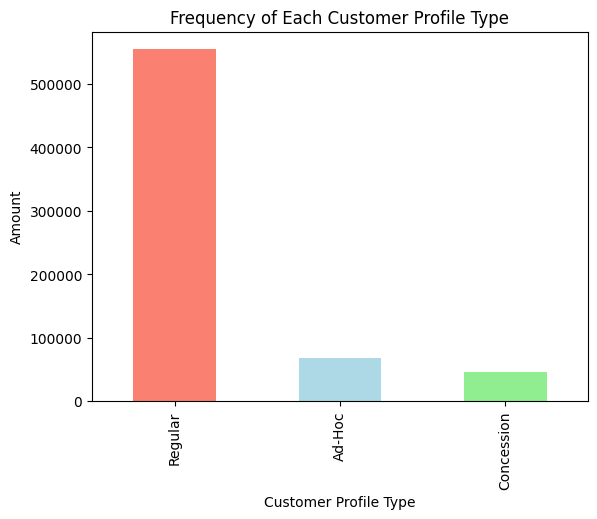

In [99]:
commuters['type'].value_counts().plot(kind="bar",
                                      color=['salmon', 'lightblue', 'lightgreen']);

plt.title('Frequency of Each Customer Profile Type')
plt.xlabel('Customer Profile Type')
plt.ylabel('Amount');

**Observation**

We can see that more number of commuters are of `Regular` type rather than Concession of Ad-Hoc. It means that the ratio of regular customers is more than the others. 

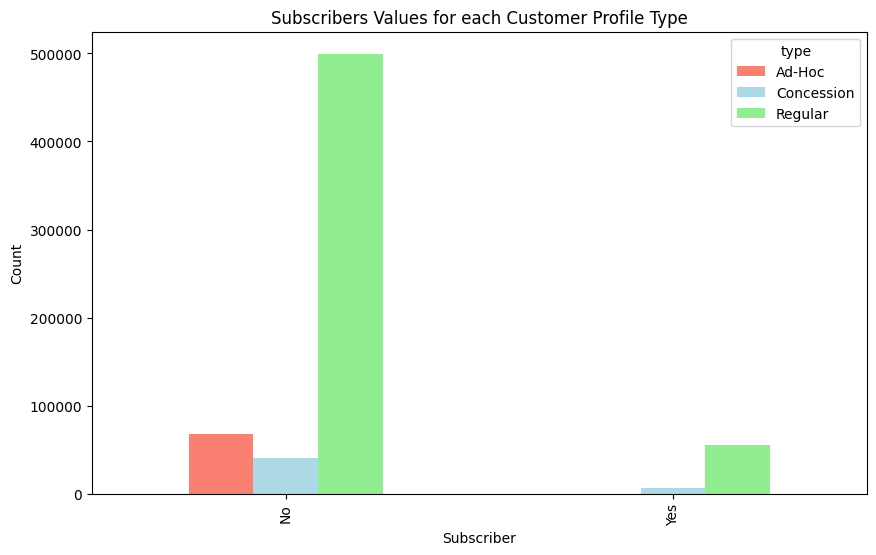

In [100]:
pd.crosstab(commuters.subscriber, commuters.type).plot(kind="bar", figsize=(10, 6), color=["salmon", "lightblue", "lightgreen"])

plt.title("Subscribers Values for each Customer Profile Type")
plt.xlabel("Subscriber")
plt.ylabel("Count");

**Observation**

We can see here that the more `Regular` commuters are `Non-Subscribing` commuters. Whereas here we can see that `Ad-Hoc` type of commuters are less in amount but all of them are Non-Subscribing. We cannot see any of `Ad-Hoc` commuter who is Subscribing as well.

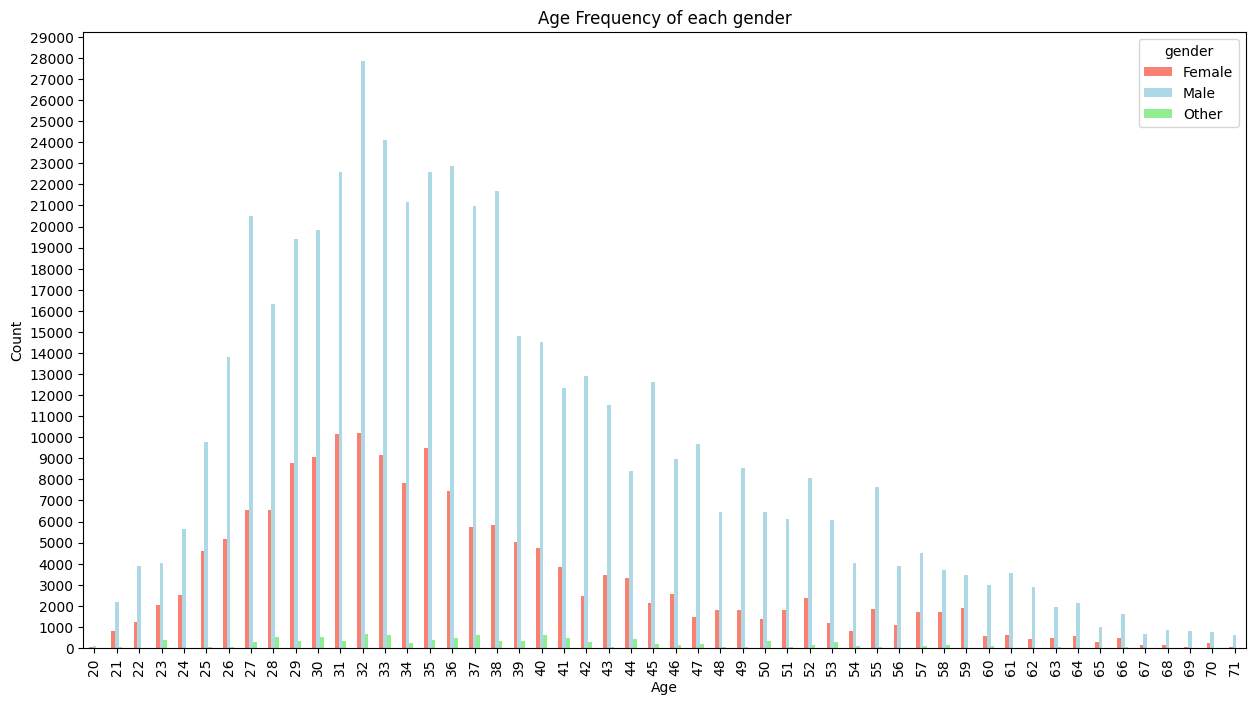

In [101]:
pd.crosstab(commuters['age'], commuters['gender']).plot(kind="bar", figsize=(15, 8), color=['salmon', 'lightblue', 'lightgreen'])

plt.title("Age Frequency of each gender")
plt.xlabel("Age")
plt.ylabel("Count");
plt.yticks(np.arange(0, 30000, 1000));

**Observation**

Here we can infer that more of the commuters are Males. Also, the maximum number of commuters are of age `32`. This graph is clearly showing that we have very rare amount of commuters who have `other` gender. Also after age 60, there is quite less number of Females. The range of age can be seen from 20 to 71.

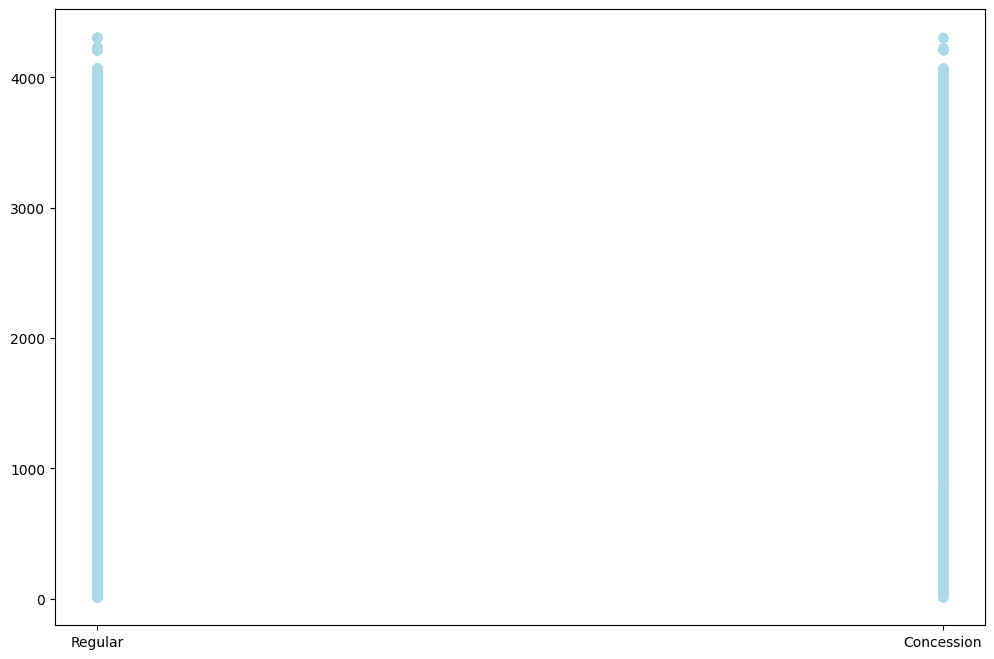

In [102]:
# Create figure
plt.figure(figsize=(12,8))

# Scatter for subsctibing customer
plt.scatter(commuters.type[commuters.subscriber=="Yes"], 
            commuters.id[commuters.subscriber=="Yes"], 
            c="lightblue"); # axis always come as (x, y)


**Observation**

From the given information we can infer that there are no `Ad-Hoc` type of commuters who are subscribers. But we can see the graph of those commuters who are non-subscriber. This will show us that the non-subscribers are of each type.

C:\Users\Muhammad Hassan\AppData\Roaming\Python\Python310\site-packages\IPython\core\events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
C:\Users\Muhammad Hassan\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


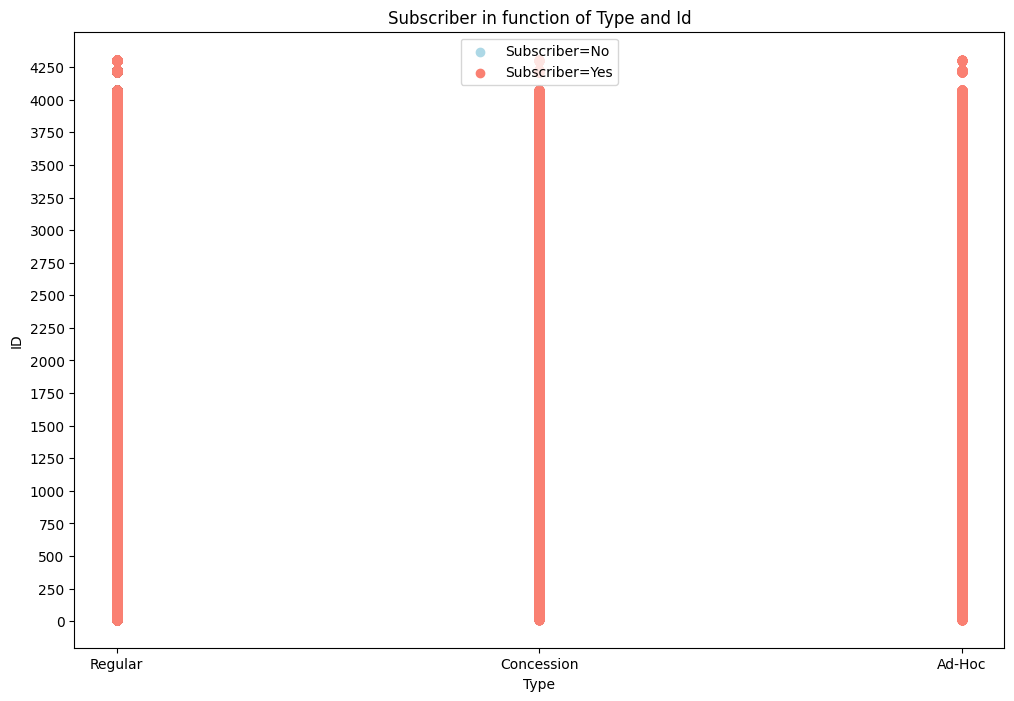

In [103]:
# Create figure
plt.figure(figsize=(12,8))

# Scatter for subsctibing customer
plt.scatter(commuters.type[commuters.subscriber=="Yes"], 
            commuters.id[commuters.subscriber=="Yes"], 
            c="lightblue") # axis always come as (x, y)


# Scatter for non-subscribing customer
plt.scatter(commuters.type[commuters.subscriber=="No"], 
            commuters.id[commuters.subscriber=="No"], 
            c="salmon") # define it as a scatter figure

# Add some helpful info
plt.title("Subscriber in function of Type and Id")
plt.xlabel("Type")
plt.legend(["Subscriber=No", "Subscriber=Yes"])
plt.ylabel("ID")
plt.yticks(np.arange(0, 4500, 250));

**Observation**

Now we can see that all the `lightblue` dots are hidden below the `salmon` dots. This is because the `non-subscribing` commuters are in all type of commuters and in all genders (will be shown below)

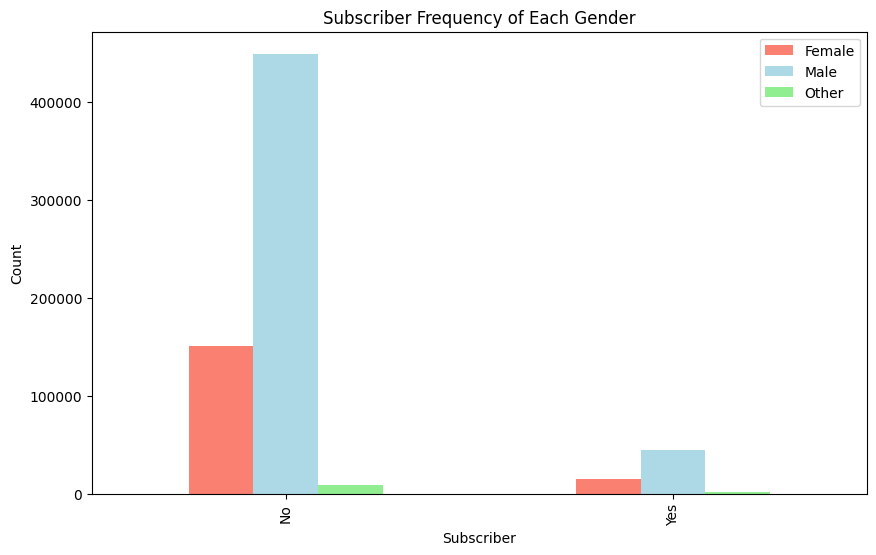

In [104]:
pd.crosstab(commuters['subscriber'], commuters['gender']).plot(figsize=(10, 6), kind='bar', color=['salmon', 'lightblue', 'lightgreen']);

# Add some helpful info
plt.title("Subscriber Frequency of Each Gender")
plt.xlabel("Subscriber")
plt.legend(["Female", "Male", "Other"])
plt.ylabel("Count");

**Observation**

When we compare the subscribing and non-subscribing commuters, we can get to know that more number of Males and females are un-subscribing. Commuters with `other` as gender are only non-subscribing commuters. 

Now as a whole we can infer that more number of consumers are `Un-Subscribing` altogether.

## Interesting Insights

1. More number of commuters are `Males`.
2. More number of commuters are `Un-Subscribing`.
3. We mostly have the `Regular` type of customers.
4. We can feel that the commuters of age range `25-40` are in greater amount. This means that we have more young commuters than the other aged ones.
5. Different commuters start their journey at different times but mostly the journey is started in evening time.
